<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

### Main features:

- ✅ Computational reproducibility across all major operating systems and platforms
- ✅ A simple and intuitive API that fits into your existing workflow
- ✅ Verifiable, traceable, reproducible results in scientific documents
- ✅ Fancy PDF outputs

### Roadmap features:

- 🔳 Fancy HTML outputs
- 🔳 Data validation, versioning, and provenance tracking
- 🔳 Support for more target publishers and document formats
- 🔳 Deep linking to verified open data and code

## Current support

### Workflows
As of v0.0.1, reproduce.work has supprt for development/analysis workflows based on:

- Python
- Jupyter notebooks
- R, RStudio
- Julia
- pandoc

### Target publishers and document formats
Primary outputs are currently PDF and HTML documents, with support for:

- LaTeX
- Jupyter notebooks
- RMarkdown
- pandoc markdown

## Install

```sh
pip install reproduce_work
```

## How to use

### Getting started

In [1]:
import reproduce_work
from reproduce_work.core import generate_config,read_base_config
from reproduce_work.dynamic import publish_variable,publish_data,publish_file

Setting reproduce.work config dir to ./reproduce
Setting reproduce.work config dir to ./reproduce


Generate configuration at beginning of your project

In [2]:
generate_config(inputs={
    'authors': {
        'author1': {
            'name': 'Alex P. Miller',
            'email': 'alex.miller@marshall.usc.edu',
            'affiliation': 'USC Marshall School of Business'
        }
     },
     'dev_image_tag': 'reproduce-work-dev',
     #'verbose': True # enables print statements whenever data are updated/saved
})

Successfully generated reproduce.work configuration at reproduce/config.toml
Successfully generated input file at reproduce/main.md
Successfully generated latex template at reproduce/latex/template.tex


Run code to analyze data and generate figures

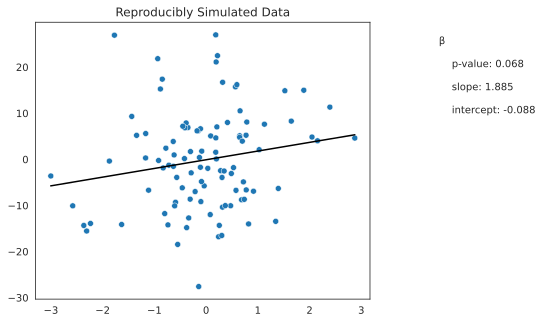

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.rcParams['figure.figsize'] = [6, 5]

random_state = np.random.RandomState(552)

# Generate data
x = random_state.normal(size=100)
y = 0.5*x + random_state.normal(scale=10, size=100)

# Plot data with seaborn
sns.set_style('white')

# compute slope and stats
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# plot x-y scatter data
x_y_plot = sns.scatterplot(x=x, y=y)

# plot best fit line
x_y_plot.plot(x, intercept + slope*x, color='black')

# Compute p-value of slope 
# render p-value with 3 decimal places and no scientific notation
p_value_str = f'{p_value:.3f}'

# add p-value and slope to plot
x_y_plot.text(x=4.5, y=25, s='β')
x_y_plot.text(x=4.75, y=20, s=f'p-value: {p_value_str}')
x_y_plot.text(x=4.75, y=15, s=f'slope: {slope:.3f}')
x_y_plot.text(x=4.75, y=10, s=f'intercept: {intercept:.3f}')

# Set title
x_y_plot.set_title('Reproducibly Simulated Data')

# save figure
plt.savefig('reproducible_plot.svg', bbox_inches='tight')

There are three primary types:

- named variables
    - defined via: `reproduce_work.publish_variable`
    - Designed to be used to facilitate production and review of reproducible results
- data assignments
    - defined via: `reproduce_work.publish_data`
    - Designed to standardize data management and facilitate data validation
- file assignments
    - defined via: `reproduce_work.publish_file`
    - Designed to standardize file management and facilitate file validation, allowing for reproducible workflows for arbitrarily complex data structures


In [4]:
publish_variable(p_value_str, "p_value_str", metadata={
    'description': 'The p-value of the coefficient on the slope of the linear regression line.',
})

In [5]:
publish_data(x, "x", metadata={
    'description': 'The simulated X data',
    'units': 'kilograms'
})

In [6]:
publish_data(y, "y", metadata={
    'description': 'The simulated Y data',
    'units': 'meters'
})

In [7]:
publish_file('reproducible_plot.svg', metadata={
    'description': 'A plot of X vs Y',
})

In [8]:
base_config = read_base_config()
with open(base_config['repro']['files']['dynamic'], 'r') as f:
    print(f.read())

[p_value_str]
description = "The p-value of the coefficient on the slope of the linear regression line."
type = "string"
timestamp = "2023-10-02T09:39:49.549241"
value = "0.068"

[x]
description = "The simulated X data"
units = "kilograms"
type = "data"
timestamp = "2023-10-02T09:39:49.570843"
content_hash = "38f13b81a58a7d931600e917d77dfe8f"
timed_hash = "ca1b73c6c33f2d7ec93233d98207e7ce"
value = """
array = [-0.15438854676085806, -0.5912841266673995, 1.3457620267806991, -0.3085476927297975, -0.35074090433304067, -1.343721369940541, -0.41860346256356656, 2.392890531248967, 0.22032854237060082, 0.7867023188803995, 0.08878384294999392, 0.6565087673201803, 0.2412729155438198, 0.6854353883101262, 2.153899580706892, 0.649925720150528, 1.127458119203137, -0.6357927443286684, 0.3077660698412044, -1.6328895355458346, 0.567227693439327, -0.21246173380662106, -0.7203897514131021, 0.5952129857137533, 0.18819499630282482, -0.8834998061258611, 0.7379945086294778, -0.8471634166162177, 0.07930983762

Decide which data, figures, and files to save for publication.